# Exploratory Data Analysis


In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'axes.facecolor':'white'})


In [2]:
# import datasets
train_path = "../data/train.csv"

train_data = pd.read_csv(train_path)

In [3]:
# inspect dataset
train_data.columns

Index(['id', 'discourse_id', 'discourse_start', 'discourse_end',
       'discourse_text', 'discourse_type', 'discourse_type_num',
       'predictionstring'],
      dtype='object')

In [4]:
train_data.shape

(144293, 8)

In [5]:
train_data.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


### Check column data types and number of null entries.  

In this case, no null entries were found. The data is clean and ready to be used.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144293 entries, 0 to 144292
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  144293 non-null  object 
 1   discourse_id        144293 non-null  float64
 2   discourse_start     144293 non-null  float64
 3   discourse_end       144293 non-null  float64
 4   discourse_text      144293 non-null  object 
 5   discourse_type      144293 non-null  object 
 6   discourse_type_num  144293 non-null  object 
 7   predictionstring    144293 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.8+ MB


### List all discourse type names

In [7]:
types = list(set(train_data["discourse_type"]))
print(types)

['Concluding Statement', 'Position', 'Rebuttal', 'Evidence', 'Counterclaim', 'Claim', 'Lead']


<Figure size 1152x576 with 0 Axes>

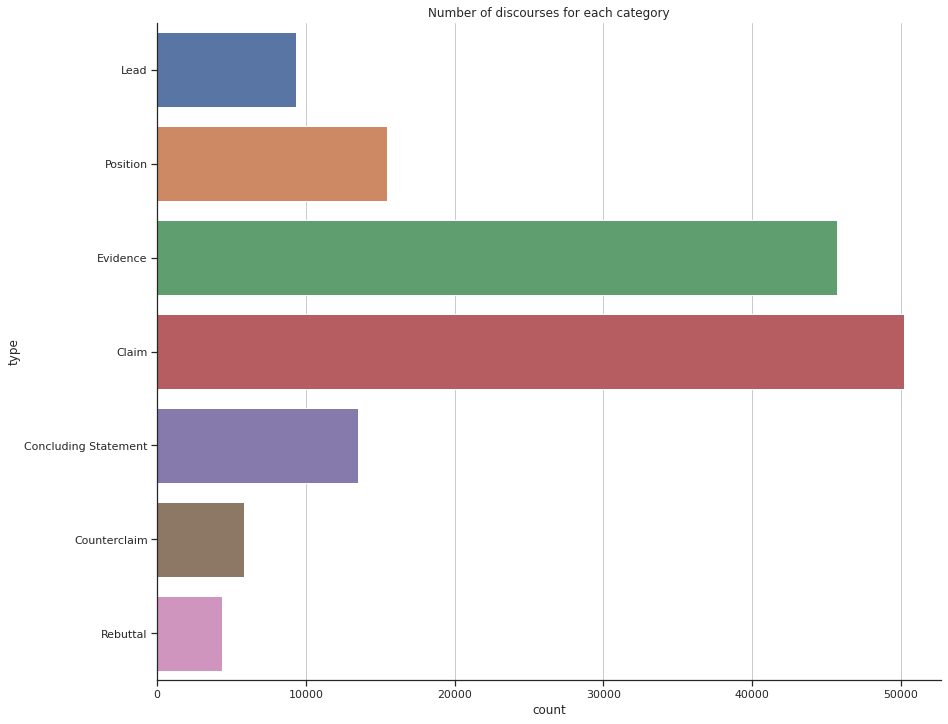

In [8]:
sns.set_style("ticks",{'axes.grid' : True})
plt.figure(figsize=(16,8))
fig = sns.catplot(y="discourse_type", data=train_data, kind="count" , height=10, aspect=4/3)
fig.set(
    title="Number of discourses for each category", ylabel="type", xlabel="count"
)
plt.show()

Most common discourse types are 'Claim' and 'Evidence'.
Least common types are 'Rebuttal' and 'Counterclaim'.

<AxesSubplot:>

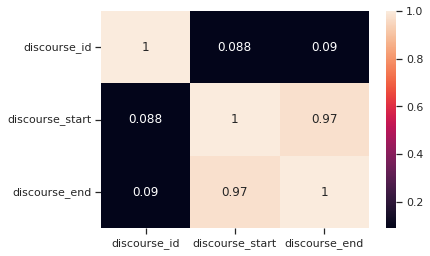

In [9]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True)

As expected, discourse_start and discourse_end are highly directly correlated.  
Since correlations can only be computed for numerical data, further steps are needed before we can extract any useful information (e.g. correlation between given sets of words and discourse type, or between length of a discourse and its type)

## Bag of Words Representation

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(train_data['discourse_text'][:1000])
# not enough memory to run the above line of code without slicing the dataset

In [11]:
print(bow)
bow_array = bow.toarray()
print(bow_array)


  (0, 1779)	1
  (0, 1361)	1
  (0, 2834)	1
  (0, 271)	2
  (0, 230)	2
  (0, 1931)	3
  (0, 2790)	2
  (0, 2042)	2
  (0, 2800)	3
  (0, 1791)	1
  (0, 2785)	1
  (0, 1352)	1
  (0, 753)	1
  (0, 1868)	1
  (0, 2639)	1
  (0, 208)	1
  (0, 869)	2
  (0, 1504)	1
  (0, 2781)	1
  (0, 339)	1
  (0, 242)	2
  (0, 1158)	1
  (0, 1528)	1
  (0, 1290)	1
  (0, 1244)	1
  :	:
  (999, 356)	2
  (999, 483)	1
  (999, 1954)	1
  (999, 1197)	1
  (999, 2951)	1
  (999, 2141)	1
  (999, 3092)	1
  (999, 2957)	1
  (999, 1355)	1
  (999, 1564)	1
  (999, 3114)	1
  (999, 898)	1
  (999, 3057)	1
  (999, 1777)	1
  (999, 2559)	1
  (999, 1818)	1
  (999, 1271)	2
  (999, 1163)	1
  (999, 2855)	1
  (999, 419)	1
  (999, 2442)	1
  (999, 2825)	1
  (999, 2984)	1
  (999, 2974)	1
  (999, 1683)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
bow_words = vectorizer.get_feature_names_out()
print(bow_words)

['00' '000' '054' ... 'zakhareuski' 'zone' 'zoning']


### Find most common words

In [14]:
import numpy as np

n_common_words = 100

frequencies = np.array([sum(x) for x in zip(*bow_array)])
sorted_frequencies = np.sort(frequencies)
# [::-1] reverses the array
most_common_frequencies = sorted_frequencies[::-1][: n_common_words]
print(most_common_frequencies)

sorted_frequency_indices = np.argsort(frequencies)
most_common_indices = sorted_frequency_indices[::-1][: n_common_words]
print(most_common_indices)

most_common_words = [bow_words[i] for i in most_common_indices]
print(most_common_words)

[1809 1489 1162  944  900  824  764  731  679  674  643  624  529  523
  521  491  467  447  432  404  393  371  358  352  332  324  306  289
  271  250  246  239  237  221  215  211  199  186  186  186  183  183
  180  178  176  175  160  159  147  144  143  142  139  139  138  138
  134  133  131  130  130  126  125  125  123  122  118  117  113  112
  109  108  106   98   93   90   90   89   89   87   87   83   82   81
   80   79   79   78   78   76   74   74   73   72   71   71   71   70
   70   70]
[2789 2833  242  899 1913 3111 1504 1405 3046 2788 2042 1510  356 1931
  271 3114  483 2016 2043 1954 1877  521 2790 2800 1290 1147 2783 2951
  358 1372 2486  489  897 2370 2810 3069  302  459  290 2957 1791  136
  240 2781 2794  465 1691 3039 1168  895 1934 1197  223 2830 1528  512
 3019  869  208  691 3057 2968 2552  742 1601  852  133  893  372 1015
 2563 1286 1962 1628  878 2791 1938 2560  122 3048 2936 1793 2364  253
 1564  121  311 2785 2033 2804 1967 2618 2728 2202 1943  471 3010

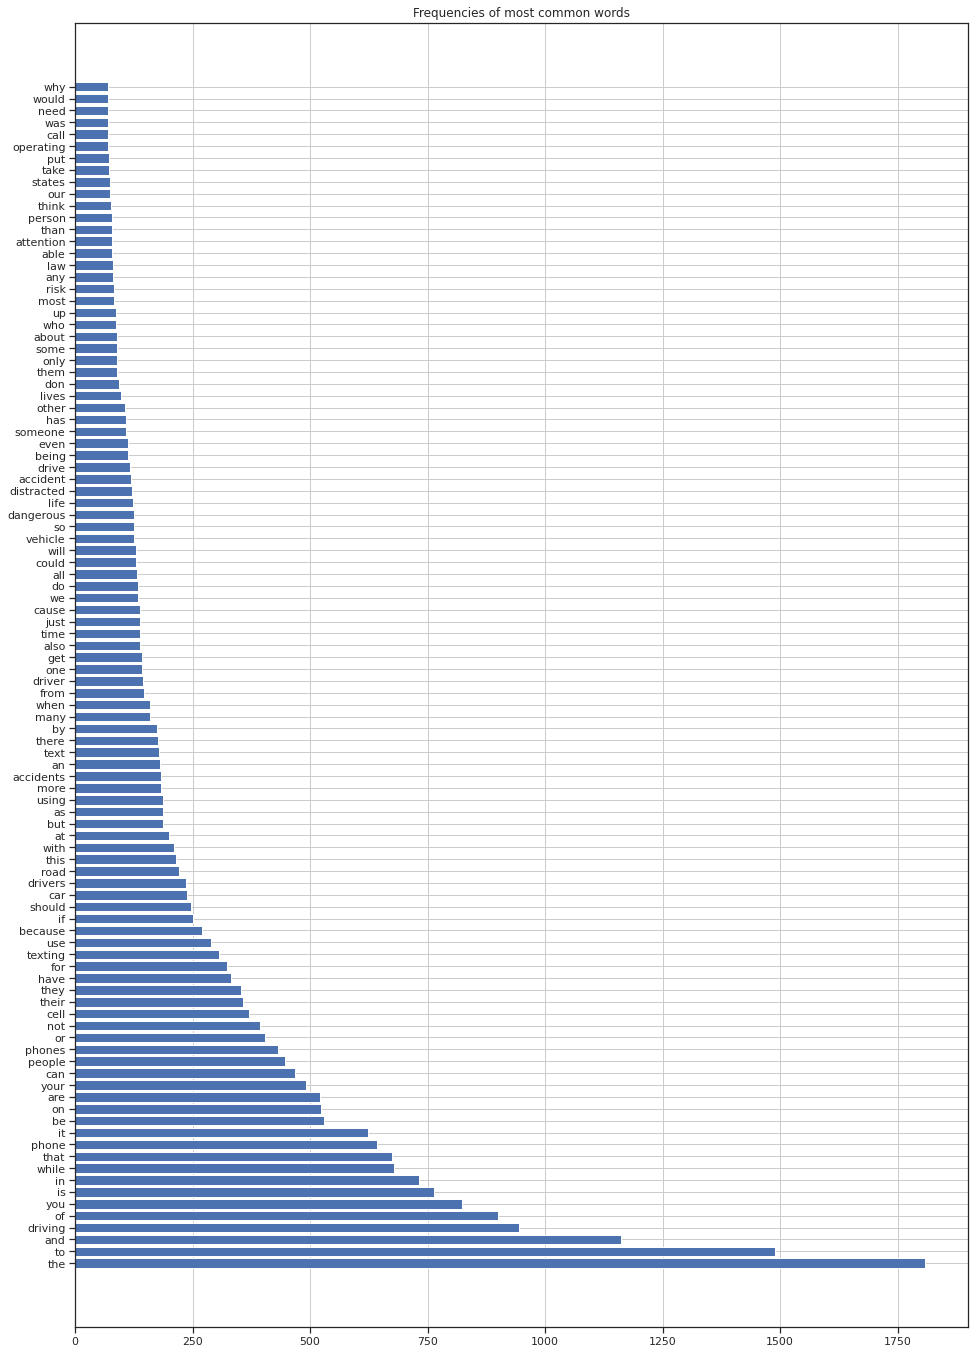

In [18]:
plt.figure(figsize=(16,24))
plt.title('Frequencies of most common words')
y_pos = np.arange(n_common_words)
# Create horizontal bars
plt.barh(y_pos, most_common_frequencies)
# Create names on the x-axis
plt.yticks(y_pos, most_common_words)
 
plt.show()

- As expected, articles, prepositions and conjunctions are the most common words. Some oof these could be safely eliminated from the dataset (at least in the BOW representation) as they do not influence the discourse type. E.g. 'the', 'of', 'and'.
- Some other common words (e.g. 'driving', 'phone') are very common and topic specific. 
- Probably the most relevant words to infer the type of discourse are pronouns and conjunctions such as 'why' or 'because'. The confirm of refute their relevance it would be interesting to make a list of candidate word features and plot their frequencies against the discourse type. Also, compute the correlation between these words and discourse type.
- Some words appear in the list twice in the singular and plural form (e.g., 'phone', 'phones'). These could be safely merged into one form only.

Next:
- try some data cleaning with the sklearn library pre-made functions
- make a list of word features and compute covariance with discourse type
- try another data structure (n-graph)
- refactor the code into functions so that the whole pipeline can be easily applied to other slices of the dataset